# Test the SVC IMage Classifier

In [50]:
from skimage import io, color
from pre_process import PreProcess
import os
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
process = PreProcess()

# Test Data Path

In [3]:
ts_path = "Data/Test_data/"

# Make Test DataFrame

In [4]:
test_df = process.test_file_labelling(ts_path)

In [5]:
test_df.head()

,Location
0,Data/Test_data/1.jpg
1,Data/Test_data/10.jpg
2,Data/Test_data/100.jpg
3,Data/Test_data/1000.jpg
4,Data/Test_data/10000.jpg


# Extracting the HOG feature

In [ ]:
test_ls = []
count = 0
df = pd.DataFrame()
for i in test_df['Location'].loc[:100]:
    extracted_feature_dog, image_path = process.extract_hog_feature(i)
    test_ls.append([extracted_feature_dog, image_path])
    print(count)
    count += 1

In [9]:
for i in range(len(test_ls)):
    df = pd.concat([df, pd.Series(test_ls[i][0])],axis=1)

In [11]:
# Transpose
df= df.transpose()

In [13]:
# Reset Index
df = df.reset_index()

In [15]:
# Dropping a Column
df.drop('index', axis = 1, inplace=True)

# Load SVC Image Classifier model

In [31]:
model = joblib.load("model output/best_svm_model.joblib")

# Prediction

In [35]:
X_test = np.array(df)

In [37]:
y_pred = model.predict(X_test)

In [61]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

# Adding y_pred to test_df

In [46]:
upd_test_df = test_df.loc[:100]

In [47]:
upd_test_df['target'] = y_pred

C:\Users\ehtes\AppData\Local\Temp\ipykernel_22676\4200914428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upd_test_df['target'] = y_pred


In [48]:
upd_test_df.head()

,Location,target
0,Data/Test_data/1.jpg,1
1,Data/Test_data/10.jpg,1
2,Data/Test_data/100.jpg,1
3,Data/Test_data/1000.jpg,1
4,Data/Test_data/10000.jpg,1


In [52]:
upd_test_df.target.unique()

array([1, 0], dtype=int64)

# Visualization

In [84]:
cat = upd_test_df[upd_test_df['target'] == 0]
dog = upd_test_df[upd_test_df['target'] == 1]

In [85]:
cat = cat[:5].reset_index()
dog = dog[:5].reset_index()

In [87]:
cat.drop('index', axis=1, inplace=True)
dog.drop('index', axis=1, inplace=True)

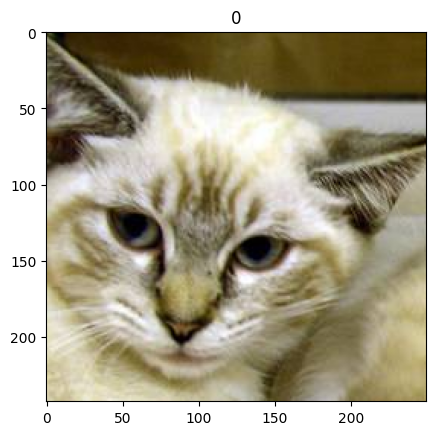

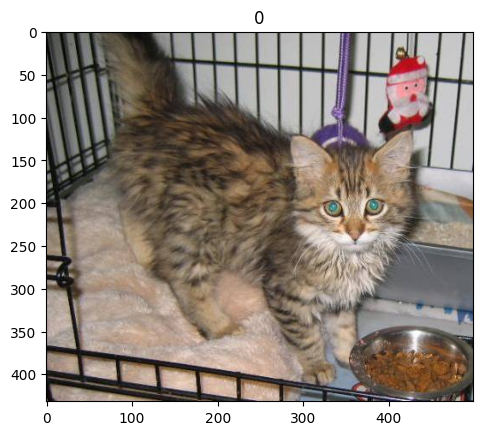

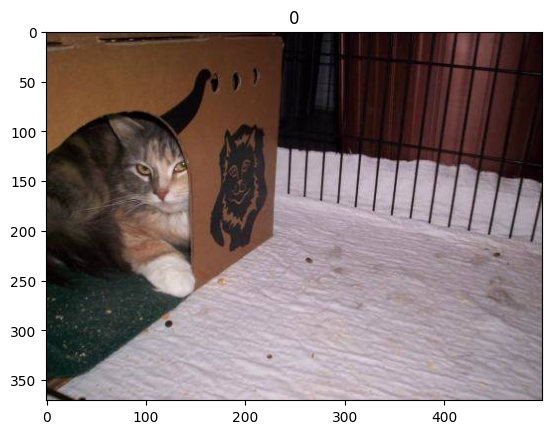

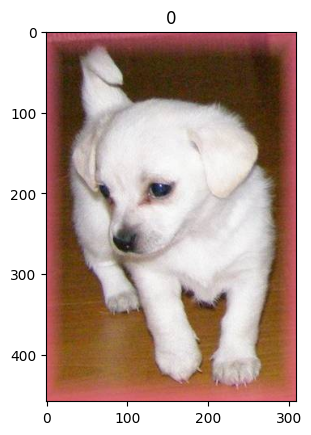

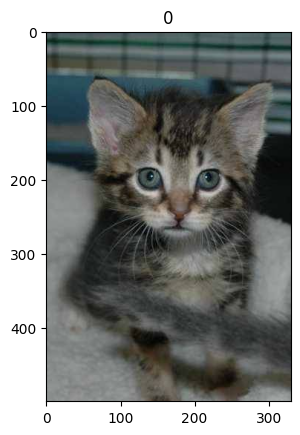

In [89]:
for i in range(5):
    img = io.imread(cat['Location'][i])
    plt.imshow(img)
    plt.title(cat.target[i])
    plt.show()

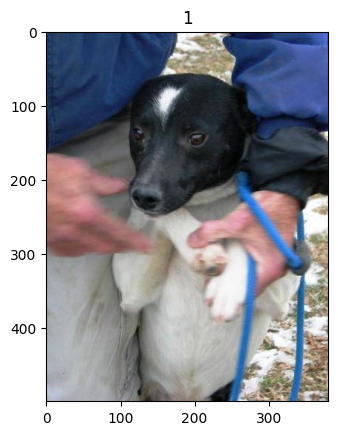

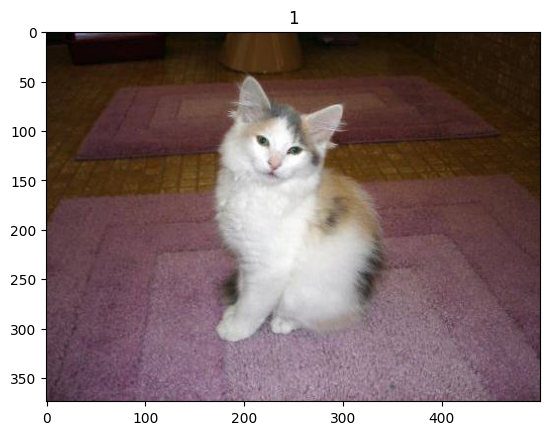

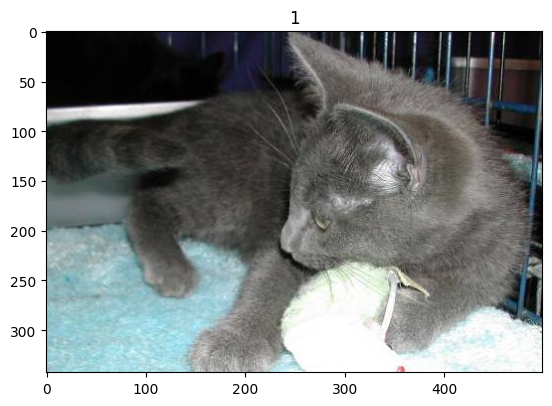

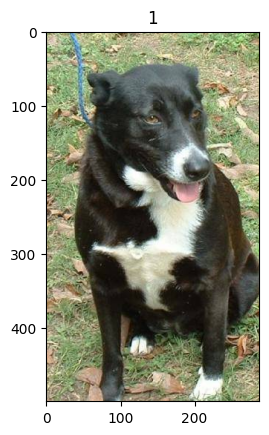

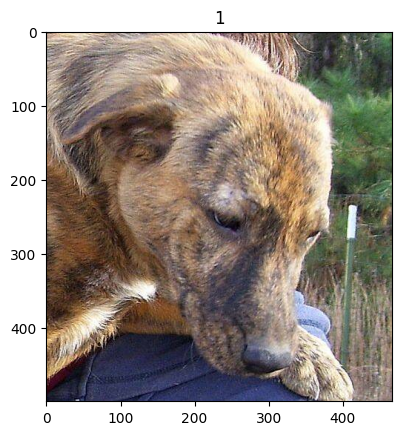

In [90]:
for i in range(5):
    img = io.imread(dog['Location'][i])
    plt.imshow(img)
    plt.title(dog.target[i])
    plt.show()